In [1]:
# 鸢尾花数据处理成二分类数据集
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
x, y = load_iris(return_X_y=True)
y=y.reshape(-1, 1)
# 每个类别是50个样本，0,1,2顺序排布
x = x[50:] # 只保留后100条数据
y = y[50:]

In [3]:
# 可视化样本分布
import matplotlib.pyplot as plt
# 使用其中的两个特征进行可视化绘制
plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1)) # 特征第一列和第二列, y 一维数据

In [4]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x[:, 1:3])

In [5]:
# 切分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=456)

In [6]:
# 使用逻辑回归算法得到最优参数，    惩罚方式，  惩罚系数
lr = LogisticRegression()
pg = {'penalty': ['l1', 'l2'], 'C':[1, 2, 5, 8]}
model = GridSearchCV(lr, pg, cv=5)
model.fit(x_train, y_train)
model.best_params_
# 将最优模型进行训练，打印测试集的得分

{'C': 1, 'penalty': 'l1'}

In [7]:
# 不想要特别好的模型，参数进行调整
lr = LogisticRegression(C=0.3, penalty='l2')
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.96

In [9]:
# 评估指标
# 准确率指标， 精确率指标， 召回率指标， 混淆矩阵， 分类报告， F1调和均值
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
# 获取测试集的预测结果
y_ = lr.predict(x_test)

In [10]:
print('准确率：', accuracy_score(y_test, y_)) # 分类模型的score就是准确率
print('精确率：', precision_score(y_test, y_))
print('召回率：', recall_score(y_test, y_))
print('混淆矩阵：', confusion_matrix(y_test, y_))
print('分类报告：', classification_report(y_test, y_))
print('f1：', f1_score(y_test, y_)) # 调和均值  精确率和召回率融合的一个结果

准确率： 0.96
精确率： 0.9565217391304348
召回率： 0.9565217391304348
混淆矩阵： [[22  1]
 [ 1 26]]
分类报告：               precision    recall  f1-score   support

           1       0.96      0.96      0.96        23
           2       0.96      0.96      0.96        27

   micro avg       0.96      0.96      0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

f1： 0.9565217391304348


In [11]:
from sklearn.metrics import roc_curve, roc_auc_score # roc曲线， roc曲线下面积

0.9871175523349437

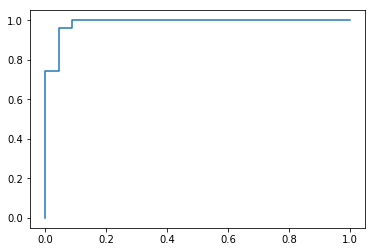

In [19]:
# 获取样本的正类别概率
y_score = lr.predict_proba(x_test)[:, -1:]
fpr, tpr, th = roc_curve(y_test-1, y_score) # 选择点
plt.plot(fpr, tpr)
roc_auc_score(y_test-1, y_score) # auc是roc曲线下方围成面积

In [14]:
help(roc_curve)

Help on function roc_curve in module sklearn.metrics.ranking:

roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
    Compute Receiver operating characteristic (ROC)
    
    Note: this implementation is restricted to the binary classification task.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    
    y_true : array, shape = [n_samples]
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.
    
    y_score : array, shape = [n_samples]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    pos_label : int or str, default=None
        Label considered as positive and others are considered negative.
    
    sample_weight : array-like of shape = [n_samples], optional
   

In [17]:
y_test

array([[2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1]])